In [1]:
import yaps
from yaps.lib import *

In [2]:
@yaps.model
def coin(x: int(lower=0, upper=1)[10]):
    theta: real(lower=0, upper=1) <~ uniform(0, 1)
    for i in range(10):
        x[i] <~ bernoulli(theta)

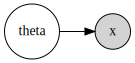

In [3]:
coin.graph

In [4]:
print(coin)

data {
  int<lower=0,upper=1> x[10];
}
parameters {
  real<lower=0,upper=1> theta;
}
model {
  theta ~ uniform(0,1);
  for (i in 1:10)
    x[i] ~ bernoulli(theta);
}



In [5]:
flips = [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
posterior = yaps.infer(coin(x=flips), iter=1000)
print("theta: {:.3f}".format(posterior.theta.mean()))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL coin_1d59d81653ce56f864b633a5388cb394 NOW.


theta: 0.249
